<a href="https://colab.research.google.com/github/sanjanb/Machine-Learning-basics/blob/main/NLP_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
amarnathr_nlp_dataset_path = kagglehub.dataset_download('amarnathr/nlp-dataset')

print('Data source import complete.')


100%|██████████| 8.44M/8.44M [00:00<00:00, 63.4MB/s]

Extracting files...


Data source import complete.


In [2]:
#!pip install nltk spacy

In [3]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')

import spacy


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
#!python -m spacy download en_core_web_sm


In [5]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
#!pip install transformers
from transformers import pipeline

# Load pre-trained sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Example text
text = "I love using Hugging Face Transformers. It's amazing!"

# Predict sentiment
result = sentiment_pipeline(text)
print(result)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.999866247177124}]


In [7]:
from transformers import pipeline

# Load Pegasus model
summarizer = pipeline("summarization", model="google/pegasus-xsum")

text = """Artificial Intelligence is transforming industries worldwide.
It is being used in finance, healthcare, and automation to improve efficiency."""

summary = summarizer(text, max_length=30, min_length=10, do_sample=False)
print(summary)


config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 30, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[{'summary_text': 'In our series of letters from African journalists, filmmaker and columnist Ahmedou Ould-Abdallah looks at some of the key stories of'}]


In [13]:
import speech_recognition as sr

recognizer = sr.Recognizer()

try:
    with sr.AudioFile("/content/sample_data/harvard.wav") as source:
        audio = recognizer.record(source)

    text = recognizer.recognize_google(audio)
    print("Transcribed Text:", text)

except sr.UnknownValueError:
    print("Google Speech Recognition could not understand the audio.")
except sr.RequestError as e:
    print(f"Could not request results from Google Speech Recognition service; {e}")


Transcribed Text: the stale smell of old beer lingers it takes heat to bring out the odor a cold dip restores health and zest a salt pickle taste fine with ham tacos al pastor are my favorite a zestful food is the hot cross bun


In [15]:
from pydub import AudioSegment

# Load and normalize the audio file
audio = AudioSegment.from_wav("/content/sample_data/harvard.wav")
normalized_audio = audio.normalize()

# Export the processed audio (optional step)
normalized_audio.export("/content/sample_data/harvard.wav", format="wav")

# Now use SpeechRecognition with the processed audio
recognizer = sr.Recognizer()
with sr.AudioFile("/content/sample_data/harvard.wav") as source:
    audio = recognizer.record(source)

try:
    text = recognizer.recognize_google(audio)
    print("Transcribed Text:", text)
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand the audio.")
except sr.RequestError as e:
    print(f"Could not request results from Google Speech Recognition service; {e}")


Transcribed Text: does snail smell of old beer lingers it takes heat to bring out the odor a cold dip restores health and zest a salt pickle taste fine with ham tacos al pastor are my favorite a zestful food is the hot cross bun


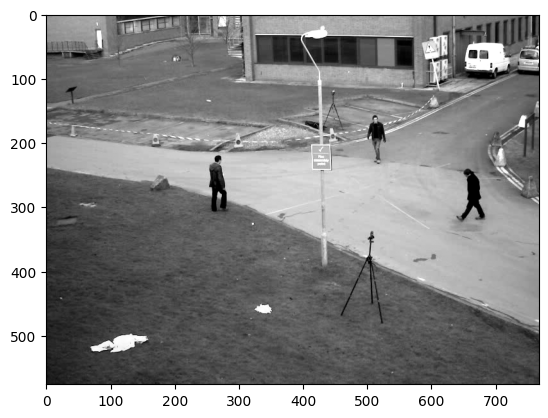

In [17]:
#!pip install opencv-python
import cv2
import matplotlib.pyplot as plt

# Read image
image = cv2.imread("/content/sample_data/Background_Subtraction_Tutorial_frame.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")
plt.show()


In [18]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
import numpy as np

model = ResNet50(weights="imagenet")

img_path = "/content/sample_data/Background_Subtraction_Tutorial_frame.png"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

preds = model.predict(img_array)
print("Predictions:", preds)


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predictions: [[1.55716934e-05 2.58997752e-05 1.93866715e-03 3.85290128e-04
  1.88533985e-03 6.75009651e-05 2.61550769e-04 4.39901632e-04
  3.10148724e-04 4.25480357e-06 2.90903643e-07 2.37325321e-06
  1.12015778e-05 3.39306303e-06 2.39345041e-04 1.04226194e-04
  3.51567724e-05 7.16506678e-04 5.23220329e-03 3.93528426e-05
  7.46569640e-06 2.18583864e-06 1.81927117e-05 6.25686425e-06
  9.37759432e-06 2.44779454e-04 1.18544349e-05 3.19439714e-05
  4.03025770e-04 5.19893729e-05 4.43506615e-05 1.42727740e-05
  6.67134714e-07 5.23268427e-05 1.43654279e-05 9.39890640e-07
  1.37536481e-04 1.35296897e-04 5.73431089e-06 3.03675444e-03
  1.36005445e-04 7.42299671e-05 1.19842291e-04 3.29540853e-05
  3.27925372e-05 4.05674000e-05 5.83392510e-04 2.35200127e-06
  4.43166262e-03 1.26156287e-04 8.09410121e-03 2.86711584e-04
  3.64137099e-06 1.40827183e-06 2.92978825e-06 2.77282452e-05
  1.07400583e-05 2.38145117e-0

In [21]:
# !git clone https://github.com/ultralytics/yolov5
# !pip install -r yolov5/requirements.txt

from yolov5 import detect

detect.run(weights="yolov5s.pt", source="/content/sample_data/test.mp4")


YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
video 1/1 (1/735) /content/sample_data/test.mp4: 480x640 1 person, 923.9ms
video 1/1 (2/735) /content/sample_data/test.mp4: 480x640 1 person, 902.8ms
video 1/1 (3/735) /content/sample_data/test.mp4: 480x640 1 person, 1 zebra, 584.0ms
video 1/1 (4/735) /content/sample_data/test.mp4: 480x640 1 zebra, 492.9ms
video 1/1 (5/735) /content/sample_data/test.mp4: 480x640 1 zebra, 627.5ms
video 1/1 (6/735) /content/sample_data/test.mp4: 480x640 1 zebra, 579.1ms
video 1/1 (7/735) /content/sample_data/test.mp4: 480x640 1 person, 1 zebra, 515.1ms
video 1/1 (8/735) /content/sample_data/test.mp4: 480x640 1 zebra, 510.8ms
video 1/1 (9/735) /content/sample_data/test.mp4: 480x640 1 zebra, 516.1ms
video 1/1 (10/735) /content/sample_data/test.mp4: 480x640 2 persons, 494.9ms
video 1/1 (11/735) /content/sample_data/test.mp4: 480x640 2 persons, 522.6ms


In [25]:
!apt-get install tesseract-ocr
!pip install pytesseract
import pytesseract
import cv2

image = cv2.imread("/content/sample_data/Screenshot 2025-01-03 174003.png")
text = pytesseract.image_to_string(image)
print("Extracted Text:", text)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Extracted Text: Nestquest

Lf aly Bt)

Deere

entire RUC)

Terms of Service

User Guidelines

Community Guidelines

ES mne log

Refund and Cancellation Policy

LSet oy

Customers

an yet

ie a
Help & Support
FAQs

Blogs

Wall of Love

LOPES Oa ano

Company Legal

About Us Nenana
fey ae ea ale
coll)

Lio)

Public Roadmap

Soy

fe gee)

feed icle dB)



In [35]:
!pip install spacy-lookups-data

In [36]:
import spacy
from spacy.training import Example

# Load or create a blank model
nlp = spacy.blank("en")

# Add NER pipeline if not present
if "ner" not in nlp.pipe_names:
    ner = nlp.add_pipe("ner")
else:
    ner = nlp.get_pipe("ner")
# Custom training data
train_data = [
    ("Elon Musk is the CEO of Tesla.", {"entities": [(0, 9, "PERSON"), (21, 26, "ORG")]}),
    ("Apple is a tech giant.", {"entities": [(0, 5, "ORG")]}),
]

# Get NER component
ner = nlp.get_pipe("ner")

# Add new labels
for _, annotations in train_data:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])

# Training loop
optimizer = nlp.begin_training()
for i in range(10):
    for text, annotations in train_data:
        example = Example.from_dict(nlp.make_doc(text), annotations)
        nlp.update([example], drop=0.5, sgd=optimizer)

# Test model
doc = nlp("Jeff Bezos founded Amazon.")
for ent in doc.ents:
    print(ent.text, ent.label_)

In [30]:
!pip install transformers
from transformers import pipeline

classifier = pipeline("zero-shot-classification")

text = "I love working with deep learning models!"
labels = ["AI", "Finance", "Sports"]

result = classifier(text, candidate_labels=labels)
print(result)


No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


{'sequence': 'I love working with deep learning models!', 'labels': ['AI', 'Sports', 'Finance'], 'scores': [0.9417882561683655, 0.031278472393751144, 0.026933277025818825]}


In [31]:
#!pip install torchvision
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt

# Load pre-trained model
model = torch.hub.load("pytorch/vision:v0.10.0", "deeplabv3_resnet101", pretrained=True)
model.eval()

# Load image
image = Image.open("/content/sample_data/Background_Subtraction_Tutorial_frame.png")
transform = T.Compose([T.Resize(256), T.ToTensor()])
image_tensor = transform(image).unsqueeze(0)

# Perform segmentation
output = model(image_tensor)["out"].argmax(1).squeeze().detach().numpy()

plt.imshow(output, cmap="gray")
plt.show()


Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 233M/233M [00:03<00:00, 62.3MB/s]


In [32]:
!pip install torch torchvision matplotlib
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.utils import save_image
import numpy as np
import os

latent_dim = 100

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# Initialize generator
generator = Generator()

# Generate random noise
z = torch.randn(16, latent_dim)

# Generate images
fake_images = generator(z).view(-1, 1, 28, 28)

# Save generated images
save_image(fake_images, "generated_images.png", nrow=4, normalize=True)


In [33]:
# Install necessary dependencies
!pip install opencv-python-headless numpy

# Download YOLOv4 config and weights files
!wget https://github.com/AlexeyAB/darknet/raw/master/cfg/yolov4.cfg -O yolov4.cfg
!wget https://github.com/AlexeyAB/darknet/releases/download/yolov4/yolov4.weights -O yolov4.weights

# Import required libraries
import cv2
import numpy as np

# Load YOLO model
net = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load image (using a sample image from Google Colab)
image = cv2.imread("/content/sample_data/Background_Subtraction_Tutorial_frame.png")
height, width = image.shape[:2]

# Preprocess image
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), swapRB=True, crop=False)
net.setInput(blob)

# Get detections
detections = net.forward(output_layers)

# Iterate over detections and draw bounding boxes
for detection in detections:
    for obj in detection:
        scores = obj[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x, center_y, w, h = obj[:4] * np.array([width, height, width, height])
            x, y = int(center_x - w / 2), int(center_y - h / 2)
            cv2.rectangle(image, (x, y), (x + int(w), y + int(h)), (0, 255, 0), 2)

# Convert the image from BGR to RGB for display in Google Colab
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the result
import matplotlib.pyplot as plt
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


--2025-02-13 05:05:27--  https://github.com/AlexeyAB/darknet/raw/master/cfg/yolov4.cfg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg [following]
--2025-02-13 05:05:27--  https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12231 (12K) [text/plain]
Saving to: ‘yolov4.cfg’

yolov4.cfg          100%[===================>]  11.94K  --.-KB/s    in 0s      

2025-02-13 05:05:27 (67.1 MB/s) - ‘yolov4.cfg’ saved [12231/12231]

--2025-02-13 05:05:27--  https://github.com/AlexeyAB/darknet/releases/d